In [2]:
#split train and test data
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

cwd = os.getcwd()
df = pd.read_csv(cwd + "/data_csv/preprocessing_data.csv")

train, test = train_test_split(df, test_size=0.1)


In [3]:
train = pd.DataFrame(train, columns=["image", "emotion"])
dictionary = {'emotion':{'HAPPINESS': 0,'NEUTRAL': 1, 'SURPRISE': 2, 'ANGER': 3, 'SADNESS': 4, 'DISGUST': 5}}
train.replace(dictionary, inplace = True)
train.to_csv(cwd + "/data_csv/train.csv")

train.groupby('emotion').count()

,image
emotion,
0,2138
1,2002
2,76
3,70
4,28
5,6


In [4]:
test = pd.DataFrame(test, columns=["image", "emotion"])
dictionary = {'emotion':{'HAPPINESS': 0,'NEUTRAL': 1, 'SURPRISE': 2, 'ANGER': 3, 'SADNESS': 4, 'DISGUST': 5}}
test.replace(dictionary, inplace = True)
test.to_csv(cwd + "/data_csv/test.csv")

test.groupby('emotion').count()

,image
emotion,
0,221
1,234
2,10
3,8
4,8


In [5]:
'''
import cv2,matplotlib.pyplot as plt,dlib,imutils
from imutils import face_utils

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("../input/dlib-68/shape_predictor_68_face_landmarks.dat")

image=plt.imread("../input/recognizing-faces-in-the-wild/train/F0002/MID1/P00009_face3.jpg")
# image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)

for rect in rects:
    pred=predictor(gray,rect)
    fig, ax1 = plt.subplots()

    ax1.imshow(image)
    ax1.scatter(face_utils.shape_to_np(pred)[:,0],face_utils.shape_to_np(pred)[:,1])
    
# del predictor
'''

'\nimport cv2,matplotlib.pyplot as plt,dlib,imutils\nfrom imutils import face_utils\n\ndetector = dlib.get_frontal_face_detector()\npredictor = dlib.shape_predictor("../input/dlib-68/shape_predictor_68_face_landmarks.dat")\n\nimage=plt.imread("../input/recognizing-faces-in-the-wild/train/F0002/MID1/P00009_face3.jpg")\n# image = imutils.resize(image, width=500)\ngray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\nrects = detector(gray, 1)\n\nfor rect in rects:\n    pred=predictor(gray,rect)\n    fig, ax1 = plt.subplots()\n\n    ax1.imshow(image)\n    ax1.scatter(face_utils.shape_to_np(pred)[:,0],face_utils.shape_to_np(pred)[:,1])\n    \n# del predictor\n'

In [6]:
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = pd.read_csv(cwd + "/train_data.csv")

#independent columns
X = data.iloc[:,0:20]

#target column
y = data.iloc[:,-1]  

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)

#naming the dataframe columns
featureScores.columns = ['Specs','Score']

#print 10 best features
print(featureScores.nlargest(10,'Score'))
'''

'\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import chi2\n\ndata = pd.read_csv(cwd + "/train_data.csv")\n\n#independent columns\nX = data.iloc[:,0:20]\n\n#target column\ny = data.iloc[:,-1]  \n\n#apply SelectKBest class to extract top 10 best features\nbestfeatures = SelectKBest(score_func=chi2, k=10)\nfit = bestfeatures.fit(X,y)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X.columns)\n\n#concat two dataframes for better visualization \nfeatureScores = pd.concat([dfcolumns, dfscores],axis=1)\n\n#naming the dataframe columns\nfeatureScores.columns = [\'Specs\',\'Score\']\n\n#print 10 best features\nprint(featureScores.nlargest(10,\'Score\'))\n'

In [7]:
df = train

In [8]:
import cv2, math, numpy as np, dlib
from imutils import face_utils

# emotion list
emotions = [0, 1, 2, 3, 4, 5] 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(cwd + "/predictor/shape_predictor_68_face_landmarks.dat")

error = 0

mlist = []
distlist = []
left_eye_list = []
right_eye_list = []
# run each image in train
def get_distance(fist_point, second_point):
    distance =  math.sqrt(math.pow(fist_point[0] - second_point[1], 2) + math.pow(fist_point[0] - second_point[1], 2))
    return abs(distance)
for idx, row in df.iterrows():
    imagePath = cwd + "/cleaned_images/" + row.image
    image = cv2.imread(imagePath)

    rects = detector(image, 0)

    if len(rects) == 0:
        error += 1
        print(row.image)

    xlist = []
    ylist = []
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks and convert the facial landmark (x, y)
        shape = predictor(image, rect)
        shape = face_utils.shape_to_np(shape)

        # loop over coordinates, draw them on the image and store coordinates in two lists
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
            # cv2.imshow("Output", image)
            xlist.append(x)
            ylist.append(y)

    # get mean of both axes to determine centre of gravity
    xmean = np.mean(xlist) 
    ymean = np.mean(ylist)

    # plot central face on image
    cv2.circle(image, (int(xmean), int(ymean)), 1, (0, 255, 0), -1)

    # find distance between mouth
    mavg = np.mean([abs(ylist[61] - ylist[67]), abs(ylist[62] - ylist[66]), abs(ylist[63] - ylist[65])])
    mlist.append(mavg)

    # find distance between left eye
    left_eye_avg = np.mean([
        get_distance([xlist[36], ylist[36]], [xlist[39], ylist[39]]),
        get_distance([xlist[37], ylist[37]], [xlist[40], ylist[40]]),
        get_distance([xlist[38], ylist[38]], [xlist[41], ylist[41]])
    ])
    left_eye_list.append(left_eye_avg)

    # find distance between right eye
    right_eye_avg = np.mean([
        get_distance([xlist[42], ylist[42]], [xlist[45], ylist[45]]),
        get_distance([xlist[43], ylist[43]], [xlist[46], ylist[46]]),
        get_distance([xlist[44], ylist[44]], [xlist[47], ylist[47]])
    ])
    right_eye_list.append(right_eye_avg)

    # find distance between every point to central point
    templist = []
    for i in range(18, 68):
        dist = math.sqrt(math.pow(xlist[i] - xmean, 2) + math.pow(ylist[i] - ymean, 2))
        templist.append(dist)
    distavg = np.mean(dist)
    distlist.append(distavg)
  
    # show the output image with the face detections + facial landmarks
    # cv2.imshow("Output", image)
    # k = cv2.waitKey(5) & 0xFF
    # if k == 68:
    #     break

print(error)

0


In [9]:
df['mouth_distance'] = mlist
df['average_distance'] = distlist
df['left_eye_distance'] = left_eye_list
df['right_eye_distance'] = right_eye_list

df.to_csv(cwd + "/data_csv/train.csv")

In [10]:
import numpy as np
import pandas as p
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df[df.columns.difference(['emotion', 'image'])]
y = df.loc[:,'emotion']
print(X)
print(X.shape, y.shape)

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.1, random_state=0)

print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print(clf.score(X_validate, y_validate))

clf = svm.SVC(kernel='poly', C=1).fit(X_train, y_train)
print(clf.score(X_validate, y_validate))

clf = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
print(clf.score(X_validate, y_validate))

      average_distance  left_eye_distance  mouth_distance  right_eye_distance
2267         59.969387          39.597980        1.666667          115.022703
2523         71.254692          46.197643       10.000000          104.651804
3522         89.386154          64.582419       37.666667          145.192592
4453         69.809623          57.039947        9.000000          131.993266
2234         57.757132          44.312025        7.333333          136.707311
...                ...                ...             ...                 ...
1723         71.499221          43.840620       18.333333          114.079894
2435         77.899359          45.726239        8.666667          115.022703
1122         61.496520          75.424723        0.666667          131.521861
4406         65.025627          56.097138        9.333333          116.436917
3342         76.670198          82.967196       21.666667          137.178716

[4320 rows x 4 columns]
(4320, 4) (4320,)
(3888, 4) (3888,)
(43

In [23]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)
                            

,PC1,PC2,PC3,PC4
average_distance,0.705300,-0.008300,-0.014200,-0.708700
left_eye_distance,0.085700,0.834400,0.540600,0.064700
mouth_distance,0.660500,0.099600,-0.337900,0.663000
right_eye_distance,0.242600,-0.542000,0.770300,0.232300


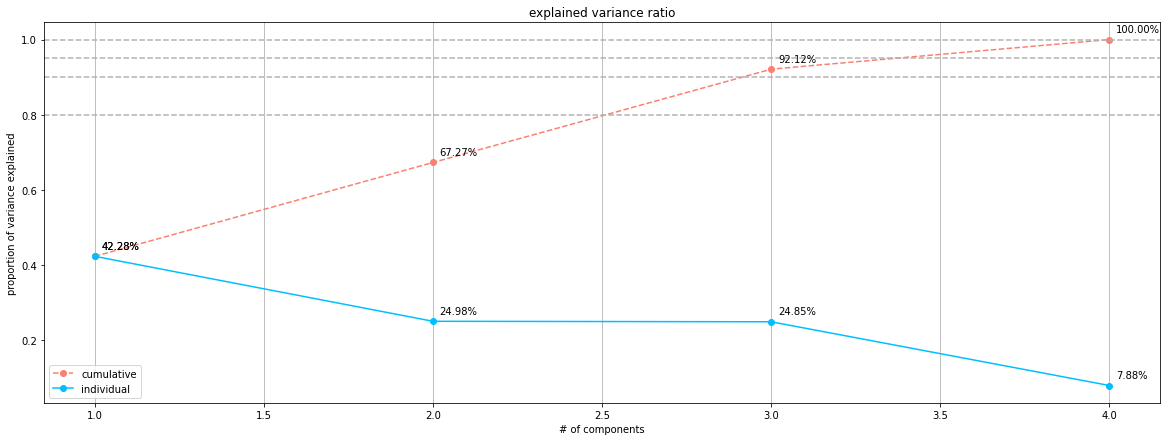

In [43]:
# Plot PCA Graph

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA(n_components=4)
X_t = scaler.fit_transform(X)
pca.fit_transform(X_t)
scree_plot(X, 4, True, True, (20 , 7))
cols=['average_distance', 'left_eye_distance', 'mouth_distance', 'right_eye_distance']
dpc=pd.DataFrame(pca.components_.T, 
                  index=cols, 
                  columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
                  
# dpc
dpc.style.applymap(lambda e: 'background-color: gray' if np.abs(e) > .5 else 'background-color: dark-white')


